## ML Лабораторная 0

### Тимофеева Наталья

### М8О-408Б-19

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#### Постановка задачи

Взят датасет с данными пациентов из США. С его помощью попытаемся выяснить вдияние различных факторов на наличие сахарного диабета

In [126]:
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [127]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [128]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [130]:
df.shape

(253680, 22)

#### Описание датасета

1) Diabetes_012 - 0 = нет диабета, 1 = диабет

2) HighBP - 0 = нет высокого артериального давления,  1 = высокое артериальное давление

3) HighChol - 0 = нет высокого уровня холестерина, 1 = высокий уровень холестерина

4) CholCheck - 0 = не проверяли холестерин в течении 5 лет, 1 = проверяли холестерин в течении 5 лет

5) BMI - Индекс массы тела

6) Smoker - Выкурил ли человек хотя бы 100 сигарет за всю свою жизнь? 0 = нет, 1 = да

7) Stroke - Был ли инсульт у человека. 0 = нет, 1 = да

8) HeartDiseaseorAttack - Ишемическая болезнь сердца (ИБС) или инфаркт миокарда (ИМ). 0 = нет, 1 = да

9) PhysActivity - Физическая активность за последние 30 дней, не включая работу, 0  == нет, 1 = да

10) Fruits - Употребляет ли человек фрукты 1 или более раз в день, 0 = нет, 1 = да

11) Veggies - Употребляет ли человек овощи 1 или более раз в день, 0 = нет, 1 = да

12) HvyAlcoholConsump - Употребляет ли человек много алкогольных напитков (взрослые мужчины >= 14 порций в неделю и взрослые женщины >= 7 порций в неделю), 0 = нет, 1 = да

13) AnyHealthcare - Имеет ли человек какое-либо медицинское страхование, 0 = нет, 1 = да

14) NoDocbcCost - Были ли случаи за последние 12 месяцев, когда нужно было обратиться к врачу, но вы не могли этого сделать из-за стоимости? 0 = нет, 1 = да

15) GenHlth - Общее состояние здоровья человека (по шкале от 1 до 5), 1 = отличное, 2 = очень хорошее, 3 = хорошее, 4 = удовлетворительное, 5 = плохое

16) MentHlth - Сколько раз за последний месяц наблюдались ментальные проблемы (стресс, депрессия)

17) PhysHlth - Сколько раз за последний месяц наблюдались травмы или физические болезни

18)DiffWalk - Испытывает ли человек серьезные трудности при ходьбе или подъеме по лестнице? 0 = нет, 1 = да

19) Sex - Пол, 0 = женский, 1 = мужской

20) Age - 13-уровневая возрастная категория

(1 = 18-24

2 = 25-29

3 = 30-34

4 = 35-39

5 = 40-44

6 = 45-49

7 = 50-54

8 = 55-59

9 = 60-64

10 = 65-69

11 = 70-74

12 = 75-79

13 = 80+)

21) Education - Уровень образования по шкале от 1 до 6

(1 = Никогда не посещал школу или только детский сад

2 = классы с 1 по 8 (начальные)

3 = классы с 9 по 11 (некоторые средние школы)

4 = 12 класс или GED (выпускник средней школы)

5 = Колледж 1-3 года (некоторый колледж или техникум)

6 = Колледж 4 года и более (выпускник колледжа))

22) Income - Шкала доходов

(1 =< 10,000

2 = 10,000-14,999

3 = 15,000-19,999

4 = 20,000-24,999

5 = 25,000-34,999

6 = 35,000-49,999

7 = 50,000-74,999

8 = >75,000)

In [131]:
df.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Пропусков в датасете нет

#### Категориальные параметры

In [132]:
target = 'Diabetes_binary'
numerical_features = ['BMI', 'MentHlth', 'PhysHlth',]
categorical_features = [feat for feat in list(df.columns) if feat != target and feat not in numerical_features]

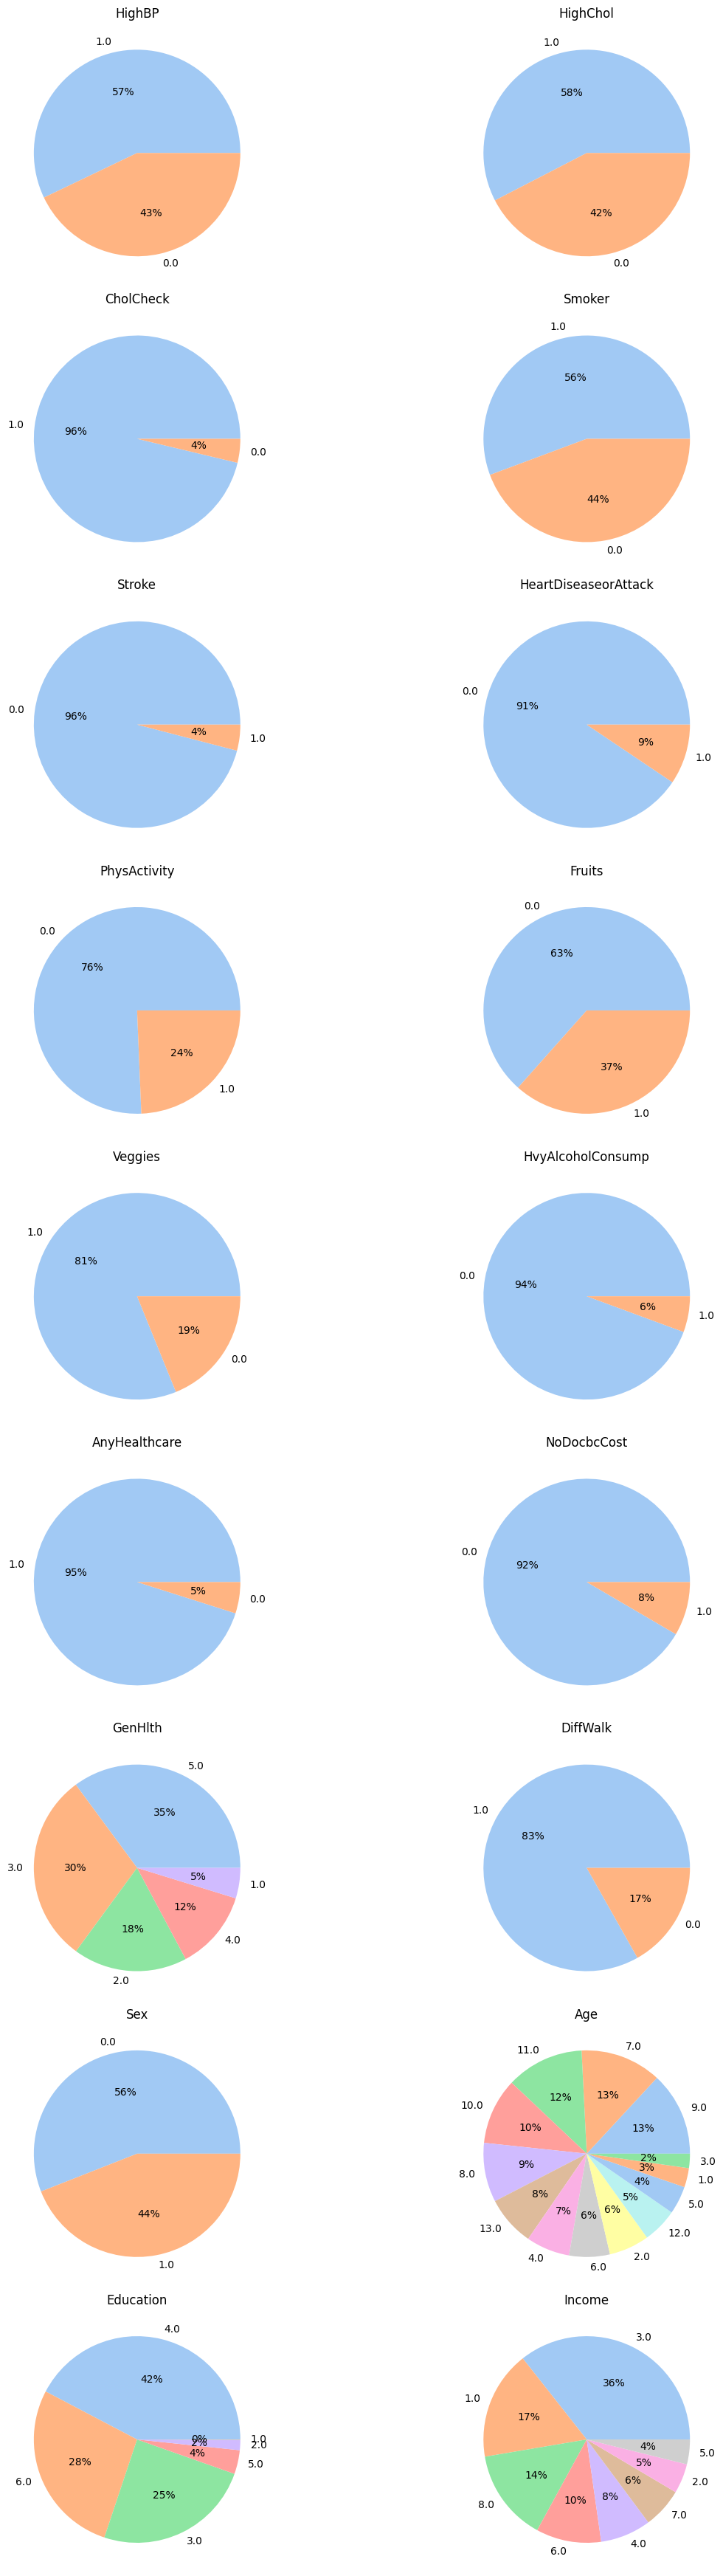

In [133]:
plt.figure(figsize=(15, 35))
colors = sns.color_palette('pastel')

for i in range(0, len(categorical_features), 2):
    plt.subplot(9, 2, i+1)
    plt.pie(x=df[categorical_features[i]].value_counts(), labels=df[categorical_features[i]].unique(), colors=colors, autopct='%.0f%%')
    plt.title(str(categorical_features[i]))
    plt.subplot(9, 2, i+2)
    plt.pie(x=df[categorical_features[i+1]].value_counts(), labels=df[categorical_features[i+1]].unique(), colors=colors, autopct='%.0f%%')
    plt.title(str(categorical_features[i+1]))

plt.tight_layout()
plt.show()

Чуть больше половины людей имеют высокое артериальное давление, высокий уровень холестерина и курят

Подавляющее большинство проверяет уровень холестерина, имеет мед страховку, не имеет достаточно средст, чтобы обратится к врачу и редко употребляет алкоголь. Также у подавляющего большинства не было инсульта или ишемической болезни сердца

Лишь четверть пациентов занимается физической активностью

1/3 едят фрукты каждый день

1/5 НЕ ест овощи каждый день

Лишь 5 процентов оценивают своё здоровье как отличное, в товремя как 35 процентов считают, что их здоровье плохое

Большинство испытывает проблемы при ходьбе и подъёме по лестнице

Чуть больше половины опрошенных женщины

Большинство опрошенных старше 50 лет, окончили школу и имеют доход выше 15000 долларов

#### Количественные параметры

In [134]:
df[numerical_features].describe()

,BMI,MentHlth,PhysHlth
count,253680.000000,253680.000000,253680.000000
mean,28.382364,3.184772,4.242081
std,6.608694,7.412847,8.717951
min,12.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000
75%,31.000000,2.000000,3.000000
max,98.000000,30.000000,30.000000


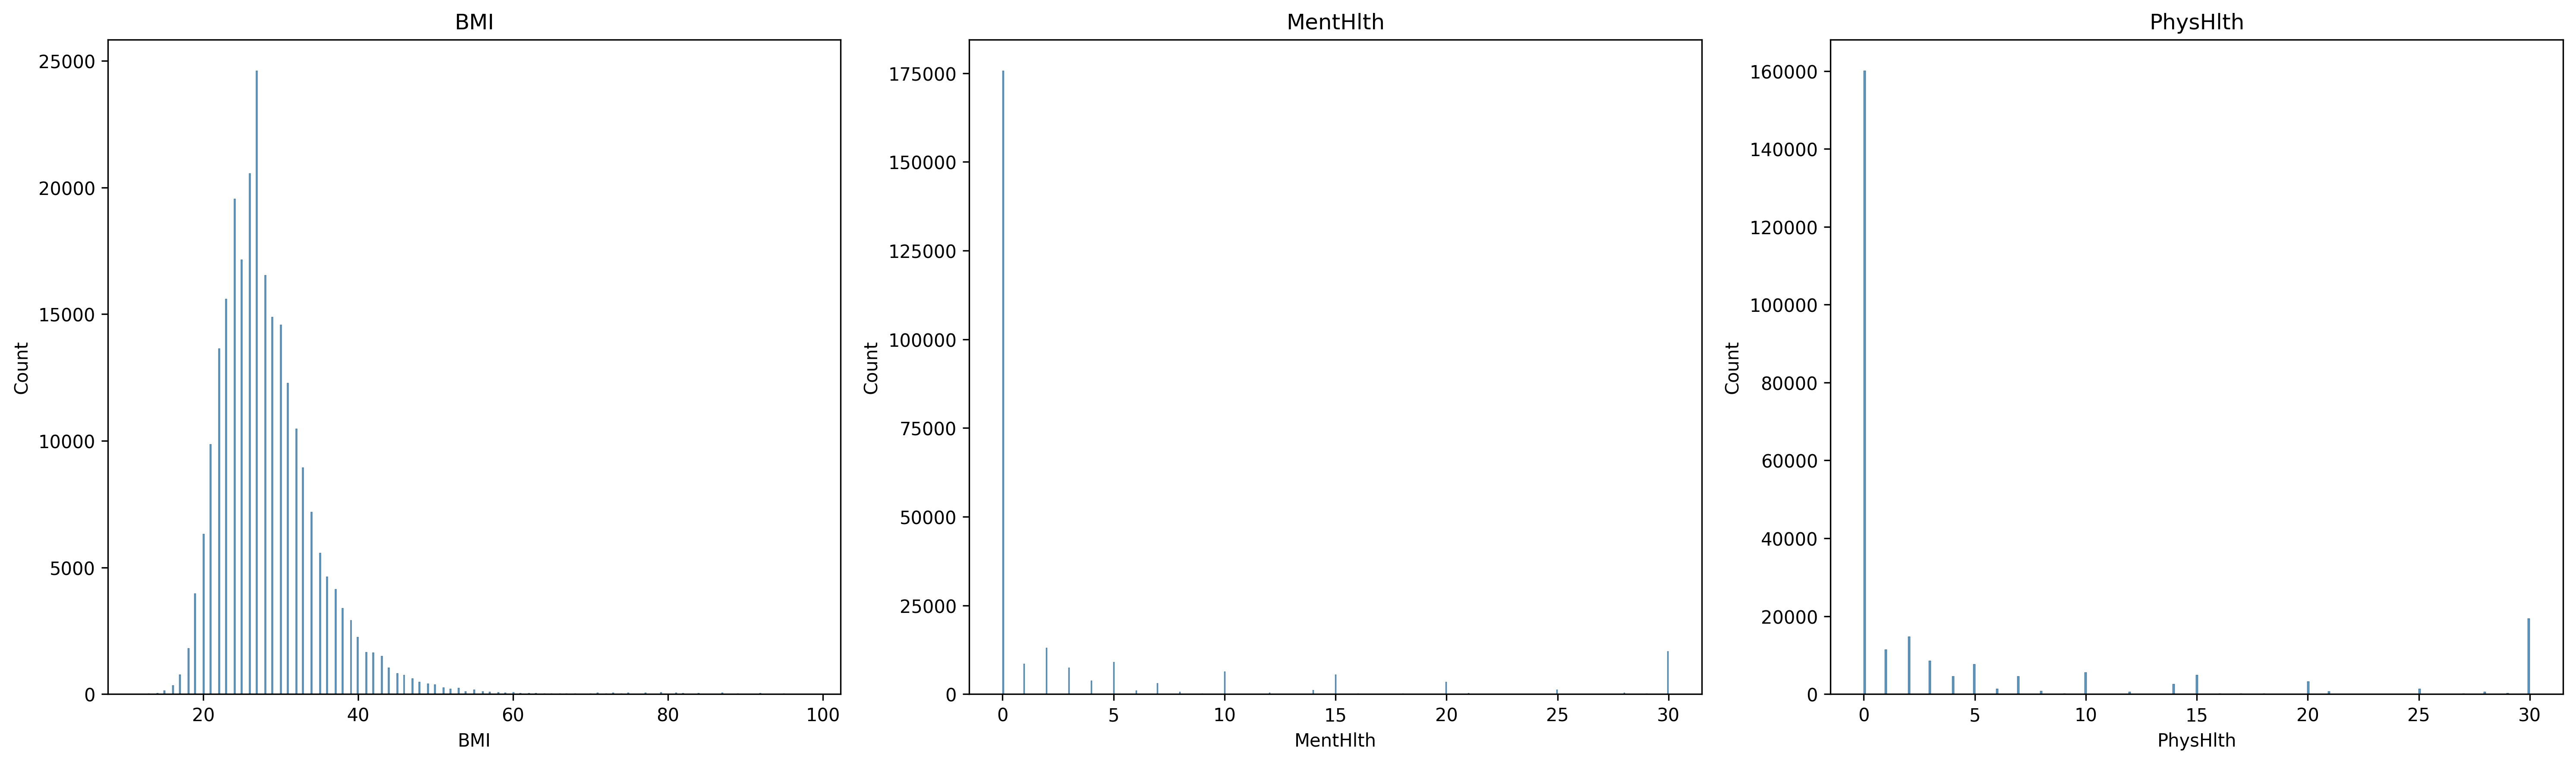

In [135]:
plt.figure(figsize=(20, 6), dpi=300)

for i, feat in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[feat])
    plt.title(str(feat))
    
plt.tight_layout()
plt.show()

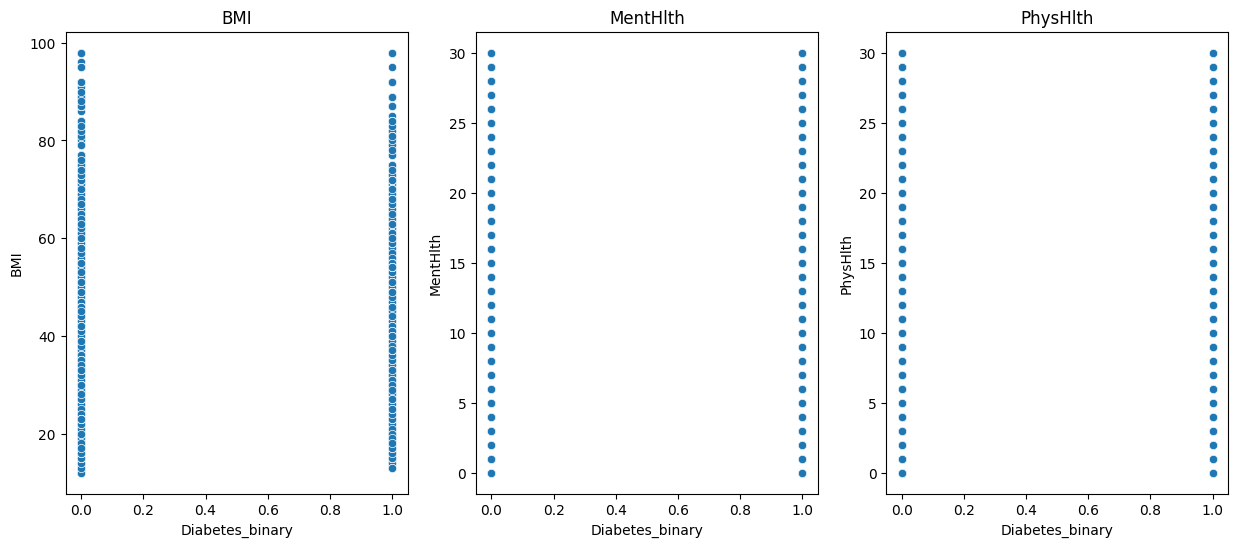

In [136]:
plt.figure(figsize=(15, 6))

for i, feat in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=df[target], y=df[feat])
    plt.xlabel(str(target))
    plt.title(str(feat))

plt.show()

Исходя из графиков можно сказать, что большая часть пациентов не испытывают проблем с ментальным или физическим здоровьем, или испытывают их лишь несколько раз. Распределение индекса массы тела похоже на нормальное.

В физическом и ментальном здоровье закономерностей не видно.

#### Таргет

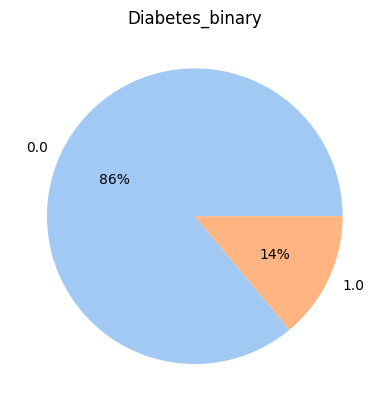

In [137]:
plt.pie(x=df[target].value_counts(), labels=df[target].unique(), colors=colors, autopct='%.0f%%')
plt.title(target)
plt.show()

Классы несбалансированные. Это нужно будет учитывать в дальнейшем.

Посмотрим на корреляционную матрицу

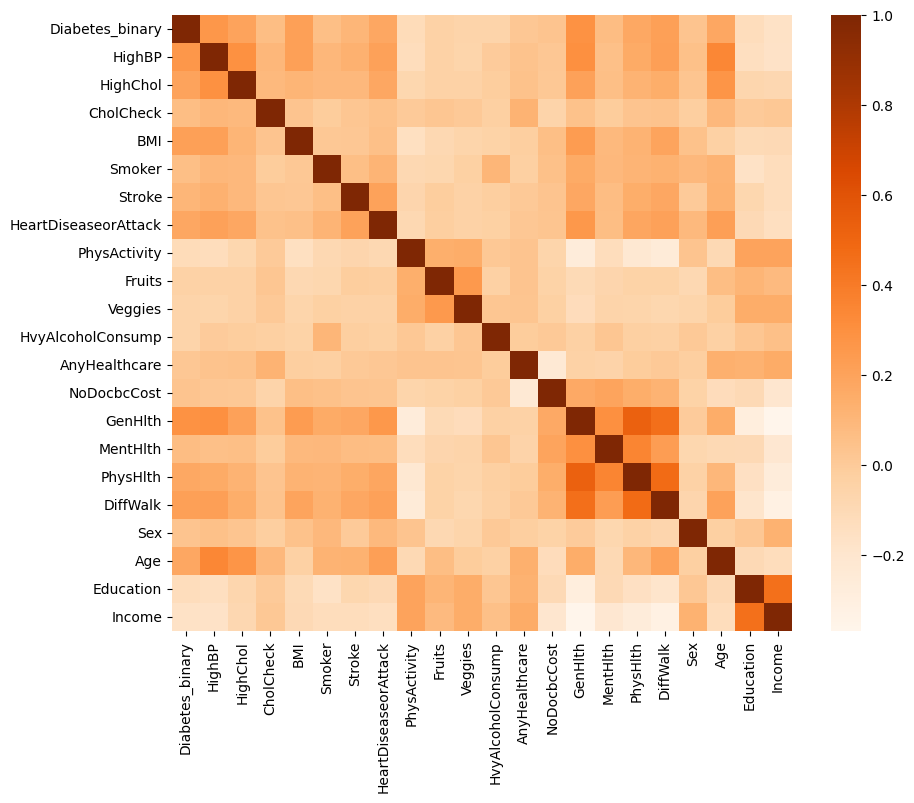

In [138]:
plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), cmap='Oranges')
plt.show()

In [139]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\volch\AppData\Local\Temp\ipykernel_10824\3129850035.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.00,0.26,0.20,0.06,0.22,0.06,0.11,0.18,-0.12,-0.04,-0.06,-0.06,0.02,0.03,0.29,0.07,0.17,0.22,0.03,0.18,-0.12,-0.16
HighBP,0.26,1.00,0.30,0.10,0.21,0.10,0.13,0.21,-0.13,-0.04,-0.06,-0.00,0.04,0.02,0.30,0.06,0.16,0.22,0.05,0.34,-0.14,-0.17
HighChol,0.20,0.30,1.00,0.09,0.11,0.09,0.09,0.18,-0.08,-0.04,-0.04,-0.01,0.04,0.01,0.21,0.06,0.12,0.14,0.03,0.27,-0.07,-0.09
CholCheck,0.06,0.10,0.09,1.00,0.03,-0.01,0.02,0.04,0.00,0.02,0.01,-0.02,0.12,-0.06,0.05,-0.01,0.03,0.04,-0.02,0.09,0.00,0.01
BMI,0.22,0.21,0.11,0.03,1.00,0.01,0.02,0.05,-0.15,-0.09,-0.06,-0.05,-0.02,0.06,0.24,0.09,0.12,0.20,0.04,-0.04,-0.10,-0.10
Smoker,0.06,0.10,0.09,-0.01,0.01,1.00,0.06,0.11,-0.09,-0.08,-0.03,0.10,-0.02,0.05,0.16,0.09,0.12,0.12,0.09,0.12,-0.16,-0.12
Stroke,0.11,0.13,0.09,0.02,0.02,0.06,1.00,0.20,-0.07,-0.01,-0.04,-0.02,0.01,0.03,0.18,0.07,0.15,0.18,0.00,0.13,-0.08,-0.13
HeartDiseaseorAttack,0.18,0.21,0.18,0.04,0.05,0.11,0.20,1.00,-0.09,-0.02,-0.04,-0.03,0.02,0.03,0.26,0.06,0.18,0.21,0.09,0.22,-0.10,-0.14
PhysActivity,-0.12,-0.13,-0.08,0.00,-0.15,-0.09,-0.07,-0.09,1.00,0.14,0.15,0.01,0.04,-0.06,-0.27,-0.13,-0.22,-0.25,0.03,-0.09,0.20,0.20
Fruits,-0.04,-0.04,-0.04,0.02,-0.09,-0.08,-0.01,-0.02,0.14,1.00,0.25,-0.04,0.03,-0.04,-0.10,-0.07,-0.04,-0.05,-0.09,0.06,0.11,0.08


Таргет коррелирует с возрастом, высоким артериальным давлением, высоким холестерином, трудностями с ходьбой, ИМТ и общим ощущением здоровья

Таргет не коррелирует с физичесокй активностью, поеданием фруктов и овощей, распиванием алкоголя, а также доходом и образованием. Интересные результаты

Мне лично было интересно узнать корреляцию инсульта, но какой либо интересной закономерности я не выявила, кроме как того, что он зависит от собственного ощущения здоровья и прочих болезней

Также поедание фруктов и овощей не влияет в данном случае практически ни на что, можно лишь сказать, что их больше едят люди с высоким доходом и люди, занимающиеся спортом (эти вещи, кстати говоря, связаны)